Vamos treinar e avaliar uma rede neural para classificar 3 especies de flores
com base em 4 caracteristicas

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import backend as k
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)# tamanho do dataset
print(numFeatures) #atributos previsores
print(list(iris.target_names))


150
4
['setosa', 'versicolor', 'virginica']


In [45]:
X = iris.data
y = iris.target

In [46]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Assim, são 4 atributos previsores, e 3 classes
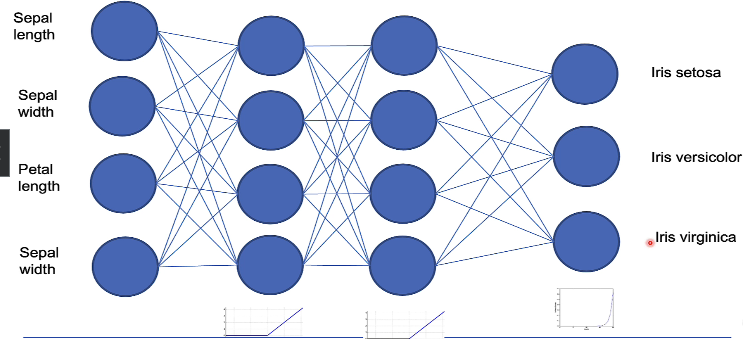

In [47]:
y = utils.to_categorical(y) #pois são classes 

In [48]:
print("Quantidade de amostras:", y.shape[0])
print("Quantidade de classes:", y.shape[1])

Quantidade de amostras: 150
Quantidade de classes: 3


In [49]:
y[50:55,:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [51]:
y_train.shape, y_test.shape

((112, 3), (38, 3))

atributos previsores * classes / 2

In [26]:
(4+3)/2

3.5

arquitetura da rede neural

In [55]:
rede_neural = Sequential([
    tf.keras.layers.InputLayer(shape = (4,)),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

In [56]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

55 pesos para ajustar

metodos de ajuste de pesos

In [57]:
rede_neural.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [58]:
rede_neural.fit(X_train, y_train, batch_size=10, epochs=1000)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.2733 - loss: 1.6569  
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3286 - loss: 1.2602 
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3873 - loss: 1.1516 
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - categorical_accuracy: 0.4856 - loss: 1.0971
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4699 - loss: 0.9629 
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - categorical_accuracy: 0.4503 - loss: 0.8957
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4378 - loss: 0.9164 
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - categorical_accuracy: 0.5033 - loss: 0.8511
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.5264 - loss: 0.8227 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4781 - loss: 0.7988 
Epo

#### avaliando o desempenho do modelo

In [60]:
rede_neural.evaluate(X_test, y_test)
# loss = 0.2 e accurary = 94%

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.9545 - loss: 0.1132 


[0.11983060836791992, 0.9473684430122375]

In [61]:
previsoes = rede_neural.predict(X_test)

previsoes = previsoes > 0.5
print(previsoes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [False False  True]
 [ True False False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False False  True]
 [False False  True]
 [False  True False]
 [False  True False]
 [False False  True]
 [False False  True]
 [ True False False]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [ True False False]
 [False False  True]]


In [62]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [63]:
import numpy as np
y_test2 = [np.argmax(t) for t in y_test]
previsoes2 = [np.argmax(t) for t in previsoes]

print(y_test2)
print(previsoes2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test2, previsoes2) # mesmo valor da validação

[1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2]
[1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2]


0.9473684210526315

In [64]:
confusion_matrix(y_test2, previsoes2)

array([[ 8,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 13]], dtype=int64)

In [65]:
y.shape

(150, 3)

#### cross validation

In [70]:
import tensorflow as tf
from tensorflow.keras import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score


def criar_modelo():
    k.clear_session()
    rede_neural = Sequential([
        tf.keras.layers.InputLayer(shape=(4,)),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=4, activation='relu'),
        tf.keras.layers.Dense(units=3, activation='softmax')
    ])
    rede_neural.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
    return rede_neural

rede_neural = KerasClassifier(model=criar_modelo, epochs=250, batch_size=10)

resultados = cross_val_score(estimator = rede_neural, X=X, y=y, cv=6, scoring='accuracy')

# print("Resultados:", resultados)
# print("Acurácia media:", resultados.mean())
# print("Desvio padrao:", resultados.std())


Epoch 1/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.2472 - loss: 1.1110  
Epoch 2/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.5640 - loss: 1.0969 
Epoch 3/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.5150 - loss: 1.0831 
Epoch 4/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.3927 - loss: 1.0749 
Epoch 5/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4133 - loss: 1.0605 
Epoch 6/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3671 - loss: 1.0556 
Epoch 7/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3626 - loss: 1.0154 
Epoch 8/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4024 - loss: 0.9551 
Epoch 9/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3623 - loss: 0.9532 
Epoch 10/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - categorical_accuracy: 0.4584 - loss: 0.8911
Epoch 11/250
13/1

In [71]:
resultados

array([1.  , 1.  , 0.88, 0.92, 0.16, 0.84])

tuning

In [75]:
def criar_modelo(optimizer, loss, kernel_initializer, activation, neurons):
    model = Sequential([tf.keras.layers.InputLayer(shape=(4,)),
            tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
            tf.keras.layers.Dense(units=neurons, activation=activation, kernel_initializer=kernel_initializer),
            tf.keras.layers.Dense(units=3, activation='softmax')])
    model.compile(optimizer=optimizer, loss=loss, metrics=['categorical_accuracy'])
    return model

rede_neural = KerasClassifier(model = criar_modelo)

parametros={
    'batch_size': [10,15,30],
    'epochs': [500, 1000],
    'model__optimizer': ['adam', 'sgd'],
    'model__loss': ['binary_crossentropy'],
    'model__kernel_initializer': ['random_uniform', 'normal'],
    'model__activation': ['relu'],
    'model__neurons': [4,6]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rede_neural, param_grid=parametros, scoring='accuracy', cv=5)

grid_search = grid_search.fit(X,y)

melhores_parametros = grid_search.best_params_
print(melhores_parametros)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.2028 - loss: 0.6932      
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4707 - loss: 0.6910 
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3867 - loss: 0.6896 
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4317 - loss: 0.6878 
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4434 - loss: 0.6866 
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4037 - loss: 0.6851 
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4414 - loss: 0.6834 
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3840 - loss: 0.6824 
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4496 - loss: 0.6805 
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4671 - loss: 0.6788 
Epoch 11/500
1

KeyboardInterrupt: 